In [315]:
"""
MONTH                | Month                                             - Integer
DAY_OF_MONTH         | Date of flight                                    - Integer
DAY_OF_WEEK          | Day of the week                                   - Integer
OP_UNIQUE_CARRIER    | Carrier code that represents the carrier company  - Object
TAIL_NUM             | Air flight number                                 - Object
DEST                 | Destination                                       - Object
DEP_DELAY            | Departure delay of the flight                     - Integer
CRS_ELAPSED_TIME     | Scheduled journey time of the flight              - Integer
DISTANCE             | Distance of the flight                            - Integer
CRS_DEP_M            | Scheduled departure time                          - Integer
DEP_TIME_M           | Actual departure time                             - Integer
CRS_ARR_M            | Scheduled arrival time                            - Integer
Temperature          | Temperature                                       - Integer
Dew Point            | Dew Point                                         - Object
Humidity             | Humidity                                          - Integer
Wind                 | Wind direction                                    - Object
Wind Speed           | Wind speed                                        - Integer
Wind Gust            | Wind gust                                         - Integer
Pressure             | Pressure                                          - Floating Point
Condition            | Condition of the climate                          - Object
sch_dep              | Number of flights scheduled for departure         - Integer
sch_arr              | Number of flights scheduled for arrival           - Integer
TAXI_OUT             | Taxi-out time                                     - Integer
"""

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics




In [316]:
#Extract data and create dataframe
df = pd.read_csv('M1_final_amended.csv', low_memory=False)
print('Dataframe dimensions:', df.shape)
df.head()

Dataframe dimensions: (28820, 24)


MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM DEST  \
0     11             3            7                AS   N487AS  LAX   
1      1            29            3                9E   N907XJ  JAX   
2     11             1            5                OO   N283SY  BNA   
3     11            11            1                OO   N269SY  BUF   
4     11            12            2                DL   N370NW  MSY   

   DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  ...  Humidity  Wind  \
0         -2               380      2475        805  ...        40   WNW   
1          0               184       828       1199  ...        46     N   
2         -4               160       765       1095  ...        44    NW   
3        158               101       301       1334  ...        90     S   
4         -5               209      1182       1170  ...        54    NW   

   Wind Speed Wind Gust  Pressure      Condition  sch_dep  sch_arr  TAXI_OUT  \
0          16        21     30.09  Mostly Cloudy       25       42         5   
1          13         0     30.14           Fair       38       31         6   
2          17         0     30.20           Fair       34       35         7   
3          13         0     29.78         Cloudy       11       11         7   
4          20         0     30.09  Partly Cloudy       37       28         7   

  TAXI_OUT_LATENESS  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 24 columns]

In [317]:

#Convert date columns into usable date format
df['DATE'] = pd.to_datetime(dict(year="2023", month=df['MONTH'], day=df['DAY_OF_MONTH']))
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.drop(columns=['DAY_OF_MONTH', 'MONTH'])
df.head()

DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM DEST  DEP_DELAY  CRS_ELAPSED_TIME  \
0            7                AS   N487AS  LAX         -2               380   
1            3                9E   N907XJ  JAX          0               184   
2            5                OO   N283SY  BNA         -4               160   
3            1                OO   N269SY  BUF        158               101   
4            2                DL   N370NW  MSY         -5               209   

   DISTANCE  CRS_DEP_M  DEP_TIME_M  CRS_ARR_M  ...  Wind Wind Speed  \
0      2475        805         803       1005  ...   WNW         16   
1       828       1199        1199       1383  ...     N         13   
2       765       1095        1091       1195  ...    NW         17   
3       301       1334          52       1435  ...     S         13   
4      1182       1170        1165       1319  ...    NW         20   

   Wind Gust Pressure      Condition  sch_dep  sch_arr TAXI_OUT  \
0         21    30.09  Mostly Cloudy       25       42        5   
1          0    30.14           Fair       38       31        6   
2          0    30.20           Fair       34       35        7   
3          0    29.78         Cloudy       11       11        7   
4          0    30.09  Partly Cloudy       37       28        7   

   TAXI_OUT_LATENESS       DATE  
0                  1 2023-11-03  
1                  1 2023-01-29  
2                  1 2023-11-01  
3                  1 2023-11-11  
4                  1 2023-11-12  

[5 rows x 23 columns]

In [318]:
#check is there any null value
df.isnull().values.any()

True

In [319]:
#null value summary
df.isnull().sum()

DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
TAXI_OUT_LATENESS    0
DATE                 0
dtype: int64

In [320]:
#Amended column subsets, made editable for quick testing
selected_columns = ['DATE', 'OP_UNIQUE_CARRIER','TAIL_NUM','DEST','DEP_DELAY','CRS_ELAPSED_TIME','DISTANCE','CRS_DEP_M','DEP_TIME_M','CRS_ARR_M','Temperature','Dew Point','Humidity','Wind','Wind Speed','Wind Gust','Pressure','Condition','sch_dep','sch_arr','TAXI_OUT','TAXI_OUT_LATENESS']
df = df[selected_columns]
#Remove NaN rows
df = df.dropna() #Only 2 rows have Null values in "wind" column,so dropping those rows
df.isnull().sum()

DATE                 0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
TAXI_OUT_LATENESS    0
dtype: int64

In [321]:
#Binning CRS_DEP_M into 24 bin
for index,row in df.iterrows():
    df.loc[index,'CRS_ELAPSED_TIME'] = math.floor(row['CRS_ELAPSED_TIME']/100)
    df.loc[index,'CRS_DEP_M'] = math.floor(row['CRS_DEP_M']/100)
    df.loc[index,'DEP_TIME_M'] = math.floor(row['DEP_TIME_M']/100)
    df.loc[index,'CRS_ARR_M'] = math.floor(row['CRS_ARR_M']/100)

df.head()

DATE OP_UNIQUE_CARRIER TAIL_NUM DEST  DEP_DELAY  CRS_ELAPSED_TIME  \
0 2023-11-03                AS   N487AS  LAX         -2                 3   
1 2023-01-29                9E   N907XJ  JAX          0                 1   
2 2023-11-01                OO   N283SY  BNA         -4                 1   
3 2023-11-11                OO   N269SY  BUF        158                 1   
4 2023-11-12                DL   N370NW  MSY         -5                 2   

   DISTANCE  CRS_DEP_M  DEP_TIME_M  CRS_ARR_M  ...  Humidity Wind  Wind Speed  \
0      2475          8           8         10  ...        40  WNW          16   
1       828         11          11         13  ...        46    N          13   
2       765         10          10         11  ...        44   NW          17   
3       301         13           0         14  ...        90    S          13   
4      1182         11          11         13  ...        54   NW          20   

  Wind Gust  Pressure      Condition  sch_dep sch_arr  TAXI_OUT  \
0        21     30.09  Mostly Cloudy       25      42         5   
1         0     30.14           Fair       38      31         6   
2         0     30.20           Fair       34      35         7   
3         0     29.78         Cloudy       11      11         7   
4         0     30.09  Partly Cloudy       37      28         7   

   TAXI_OUT_LATENESS  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  

[5 rows x 22 columns]

In [322]:
#Review the data
df.describe()

DATE     DEP_DELAY  CRS_ELAPSED_TIME  \
count                          28818  28818.000000      28818.000000   
mean   2023-08-13 11:16:22.635852544      6.373239          1.650462   
min              2023-01-01 00:00:00    -22.000000          0.000000   
25%              2023-01-23 00:00:00     -6.000000          1.000000   
50%              2023-11-14 00:00:00     -3.000000          1.000000   
75%              2023-12-08 00:00:00      2.000000          3.000000   
max              2023-12-31 00:00:00   1276.000000          6.000000   
std                              NaN     38.735195          1.239567   

           DISTANCE     CRS_DEP_M    DEP_TIME_M     CRS_ARR_M   Temperature  \
count  28818.000000  28818.000000  28818.000000  28818.000000  28818.000000   
mean    1267.787494      7.786557      7.769693      8.616767     41.491047   
min       94.000000      3.000000      0.000000      0.000000     17.000000   
25%      483.000000      5.000000      5.000000      6.000000     36.000000   
50%     1029.000000      8.000000      8.000000      9.000000     42.000000   
75%     2248.000000     10.000000     10.000000     11.000000     47.000000   
max     4983.000000     14.000000     14.000000     14.000000     68.000000   
std      889.354031      3.009234      3.076499      3.467294      8.042493   

           Humidity    Wind Speed     Wind Gust      Pressure       sch_dep  \
count  28818.000000  28818.000000  28818.000000  28818.000000  28818.000000   
mean      57.732806     12.368485      5.535707     30.092410     31.091956   
min        0.000000      0.000000      0.000000     29.200000      0.000000   
25%       46.000000      8.000000      0.000000     29.880000     26.000000   
50%       59.000000     12.000000      0.000000     30.110000     30.000000   
75%       74.000000     16.000000      0.000000     30.320000     37.000000   
max       97.000000     36.000000     49.000000     30.750000     55.000000   
std       23.469480      6.258667     11.886780      0.296158      9.510317   

            sch_arr      TAXI_OUT  TAXI_OUT_LATENESS  
count  28818.000000  28818.000000       28818.000000  
mean      28.431813     20.857207           2.538830  
min        0.000000      5.000000           1.000000  
25%       21.000000     16.000000           2.000000  
50%       30.000000     19.000000           2.000000  
75%       35.000000     25.000000           3.000000  
max       46.000000     41.000000           5.000000  
std        8.263242      6.850197           0.718464

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28818 entries, 0 to 28819
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               28818 non-null  datetime64[ns]
 1   OP_UNIQUE_CARRIER  28818 non-null  object        
 2   TAIL_NUM           28818 non-null  object        
 3   DEST               28818 non-null  object        
 4   DEP_DELAY          28818 non-null  int64         
 5   CRS_ELAPSED_TIME   28818 non-null  int64         
 6   DISTANCE           28818 non-null  int64         
 7   CRS_DEP_M          28818 non-null  int64         
 8   DEP_TIME_M         28818 non-null  int64         
 9   CRS_ARR_M          28818 non-null  int64         
 10  Temperature        28818 non-null  int64         
 11  Dew Point          28818 non-null  object        
 12  Humidity           28818 non-null  int64         
 13  Wind               28818 non-null  object        
 14  Wind Speed 

In [184]:
"""
#Python is crazy, shelving this for now, iterated on another application!
value ='z'
for index,row in df.iterrows():
    if (0 == df.loc[index,'TAXI_OUT']) == True  :
        value = 'e'
        df.loc[index,'TAXI_OUT_LATENESS'] = value   
        break
    elif (df.loc[index,'TAXI_OUT'] <= 10) == True  :
        value = 'a'
        df.loc[index,'TAXI_OUT_LATENESS'] = value   
        break
    elif (df.loc[index,'TAXI_OUT'] <= 20) == True  :
        value = 'b'
        df.loc[index,'TAXI_OUT_LATENESS'] = value   
        break
    elif (df.loc[index,'TAXI_OUT'] <= 30) == True  :
        value = 'c'
        df.loc[index,'TAXI_OUT_LATENESS'] = value   
        break
    elif (df.loc[index,'TAXI_OUT'] <= 40) == True  :
        value = 'd'
        df.loc[index,'TAXI_OUT_LATENESS'] = value   
        break


test_column = ['TAXI_OUT','TAXI_OUT_LATENESS']
dftest = df[test_column]
dftest.groupby(['TAXI_OUT_LATENESS']).sum()
"""

"\n#Python is crazy, shelving this for now, iterated on another application!\nvalue ='z'\nfor index,row in df.iterrows():\n    if (0 == df.loc[index,'TAXI_OUT']) == True  :\n        value = 'e'\n        df.loc[index,'TAXI_OUT_LATENESS'] = value   \n        break\n    elif (df.loc[index,'TAXI_OUT'] <= 10) == True  :\n        value = 'a'\n        df.loc[index,'TAXI_OUT_LATENESS'] = value   \n        break\n    elif (df.loc[index,'TAXI_OUT'] <= 20) == True  :\n        value = 'b'\n        df.loc[index,'TAXI_OUT_LATENESS'] = value   \n        break\n    elif (df.loc[index,'TAXI_OUT'] <= 30) == True  :\n        value = 'c'\n        df.loc[index,'TAXI_OUT_LATENESS'] = value   \n        break\n    elif (df.loc[index,'TAXI_OUT'] <= 40) == True  :\n        value = 'd'\n        df.loc[index,'TAXI_OUT_LATENESS'] = value   \n        break\n\n\ntest_column = ['TAXI_OUT','TAXI_OUT_LATENESS']\ndftest = df[test_column]\ndftest.groupby(['TAXI_OUT_LATENESS']).sum()\n"

In [324]:
#Review categorised Taxi Out for easier review of expected trends/ output
test_column = ['TAXI_OUT','TAXI_OUT_LATENESS']
dftest = df[test_column]
dftest.groupby(['TAXI_OUT_LATENESS']).sum()

TAXI_OUT
TAXI_OUT_LATENESS          
1                      4165
2                    252914
3                    235473
4                    102238
5                      6273

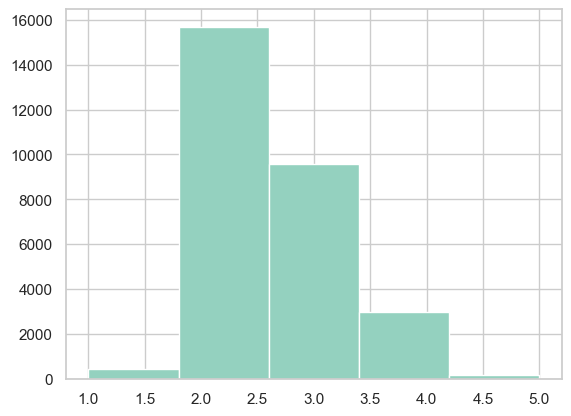

In [334]:
#Create histogram of Taxi out
x = dftest['TAXI_OUT_LATENESS']
plt.hist(x, bins=5)
plt.show()

In [186]:
#Assess Taxi out vs Carriers
test_column = ['TAXI_OUT','TAXI_OUT_LATENESS','OP_UNIQUE_CARRIER']
dftest = df[test_column]
dftest.groupby(['TAXI_OUT_LATENESS','OP_UNIQUE_CARRIER']).sum()

TAXI_OUT
TAXI_OUT_LATENESS OP_UNIQUE_CARRIER          
1                 9E                      911
                  AA                       50
                  AS                       23
                  B6                     1275
                  DL                     1478
                  HA                       10
                  MQ                       60
                  OO                      175
                  YX                      183
2                 9E                    36940
                  AA                    35870
                  AS                     4742
                  B6                    95310
                  DL                    60288
                  HA                     1048
                  MQ                     9241
                  OO                     2460
                  YX                     7015
3                 9E                    38825
                  AA                    28158
                  AS                    14758
                  B6                    65722
                  DL                    67691
                  HA                      433
                  MQ                     8851
                  OO                     2601
                  YX                     8434
4                 9E                    17189
                  AA                     9363
                  AS                     8233
                  B6                    23897
                  DL                    34461
                  HA                      238
                  MQ                     3832
                  OO                     1021
                  YX                     4004
5                 9E                     1107
                  AA                      451
                  AS                      615
                  B6                     1312
                  DL                     2091
                  HA                       82
                  MQ                      246
                  OO                      164
                  YX                      205

In [281]:
#Vain color changes
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

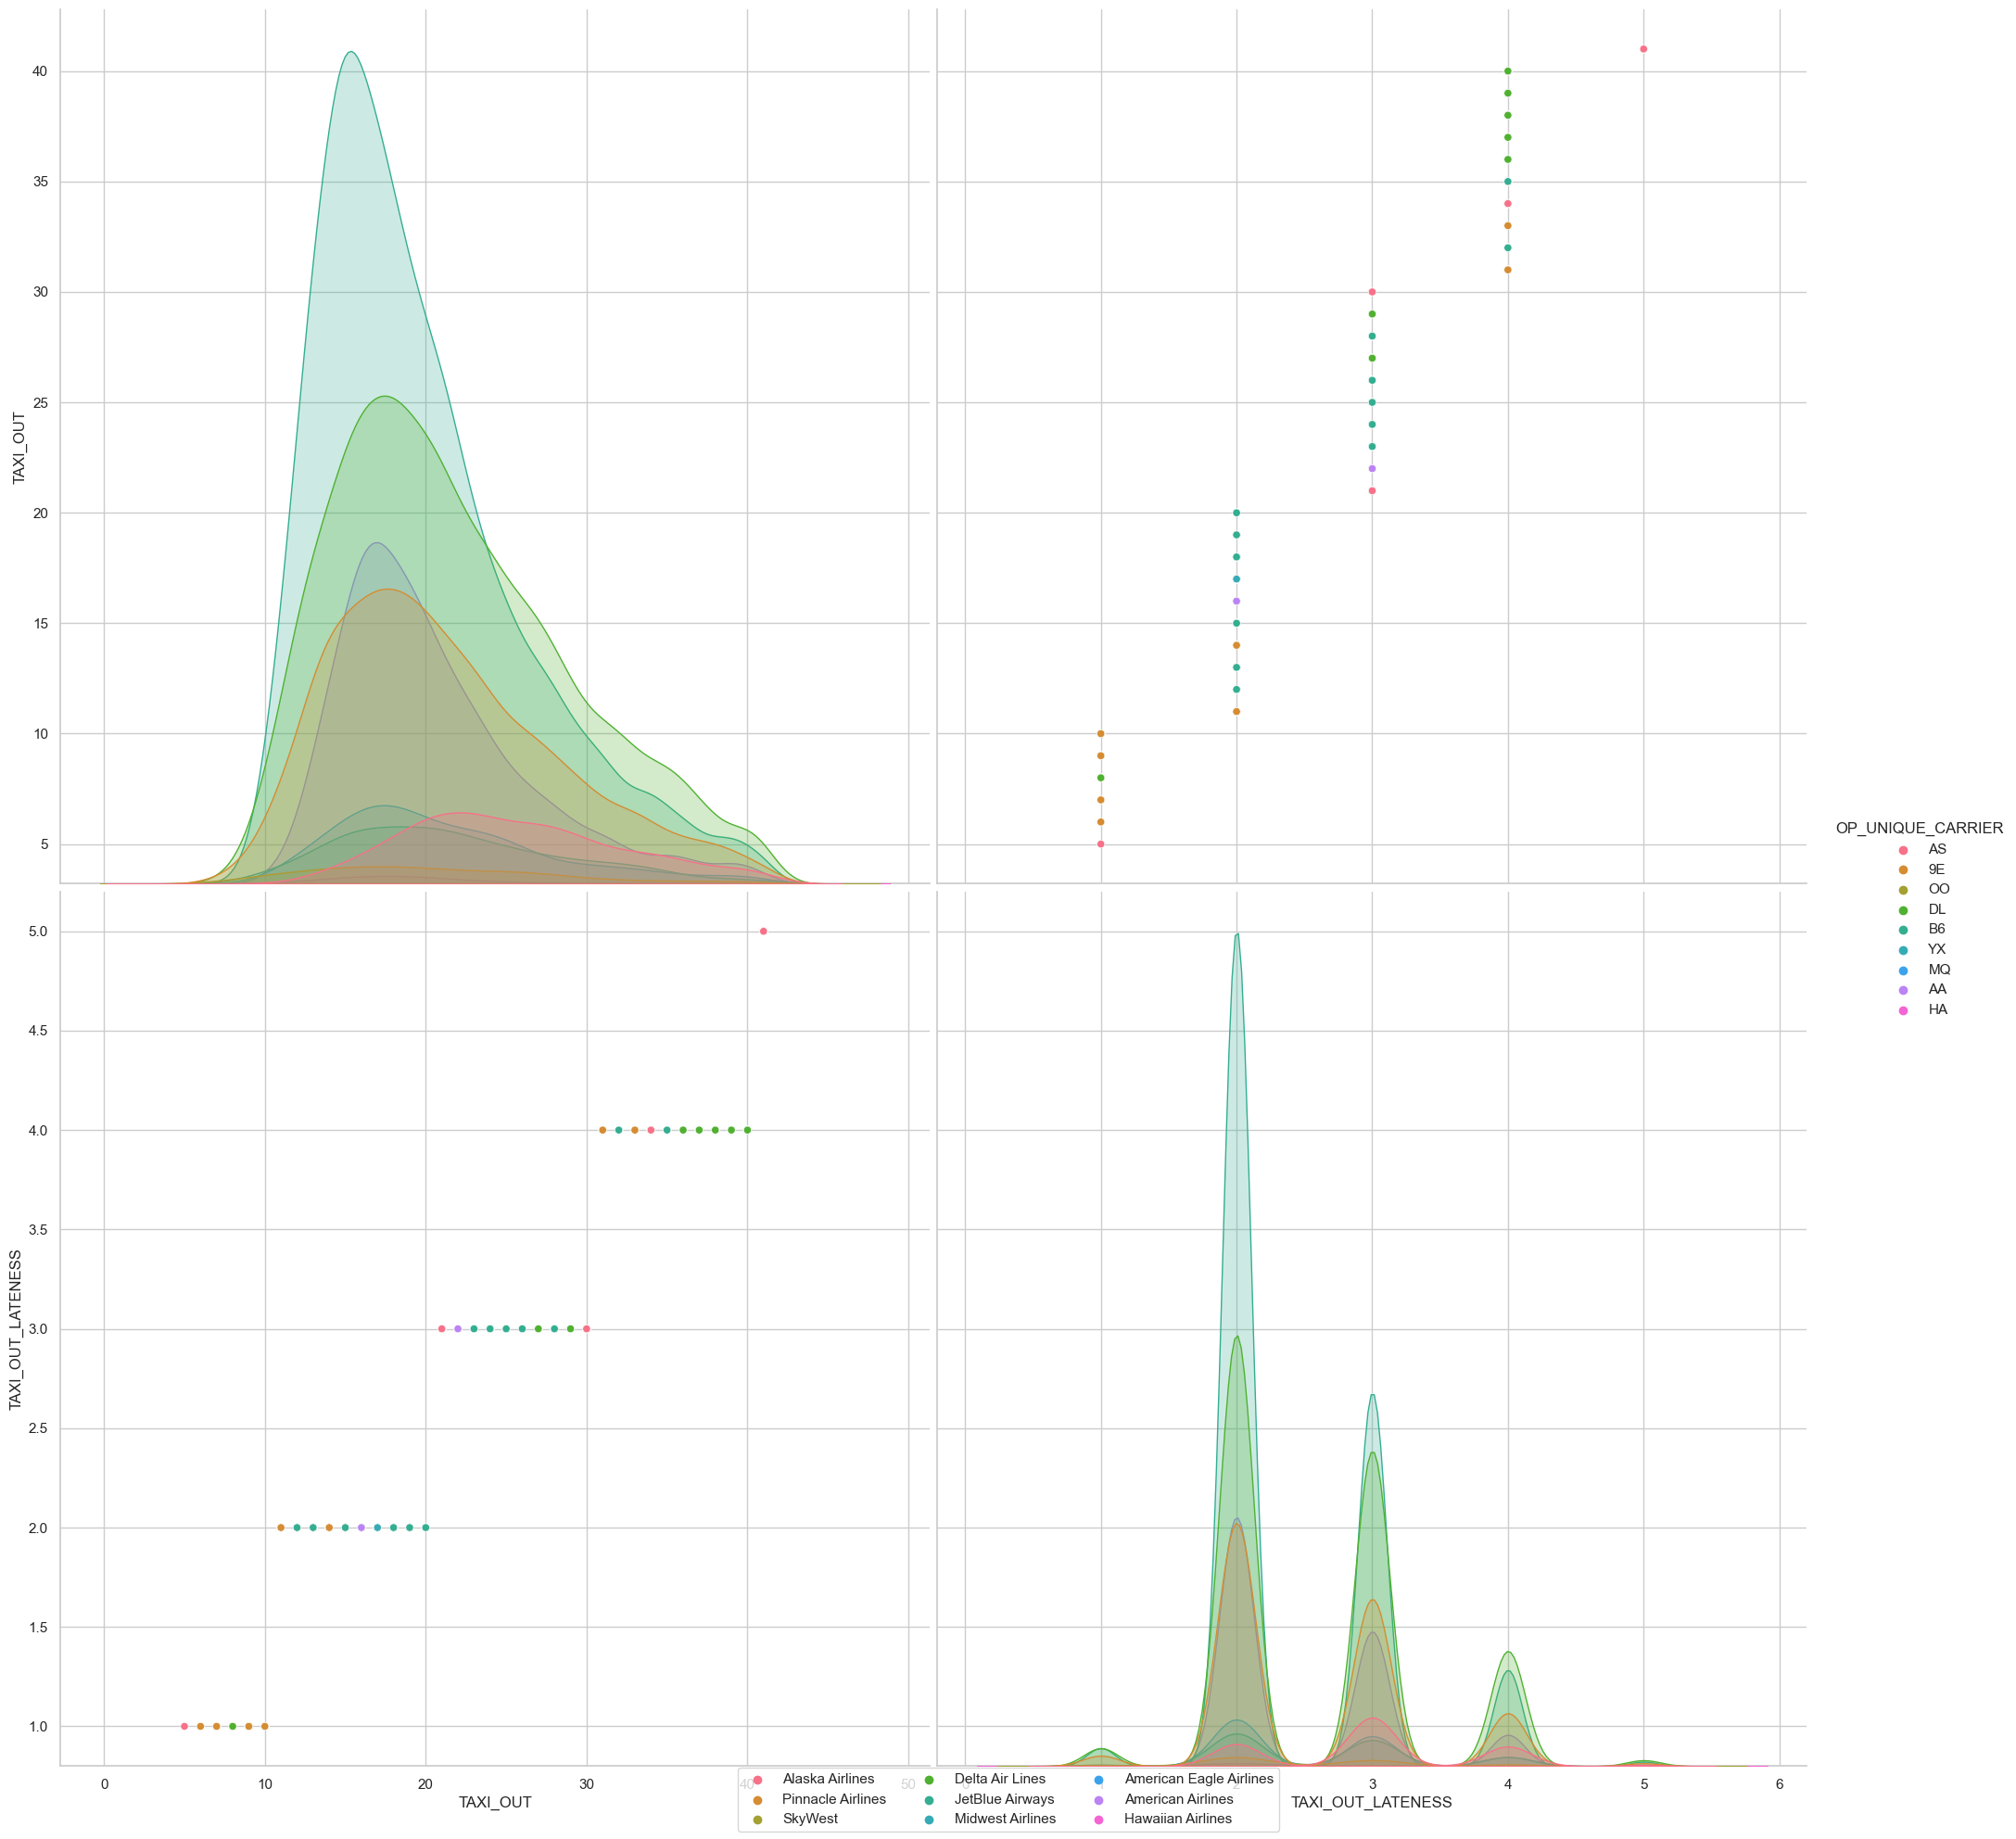

In [336]:
# Plot the Taxi out vs Carrier data
"""
data = df

df = pd.DataFrame(data)
sns.set(style="ticks", color_codes=True)
sns.pairplot(x_vars=df['OP_UNIQUE_CARRIER'],y_vars='TAXI_OUT',data=df , hue='TAXI_OUT_LATENESS')
"""
#Update datafram index
latnessIndex_ = df['TAXI_OUT_LATENESS']
df.index = latnessIndex_
data = df.loc[[1,2,3,4,5]]

data_column = ['OP_UNIQUE_CARRIER','TAXI_OUT','TAXI_OUT_LATENESS']
data = df[data_column]

#print(data)

plot1 = sns.pairplot(data,hue="OP_UNIQUE_CARRIER", height=10)
plot1.savefig('temp.png', facecolor=fig.get_facecolor(), edgecolor='none')
handles = plot1._legend_data.values()
labels = labels=['Alaska Airlines', 'Pinnacle Airlines','SkyWest','Delta Air Lines','JetBlue Airways','Midwest Airlines','American Eagle Airlines','American Airlines','Hawaiian Airlines']
plot1.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=3)

C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

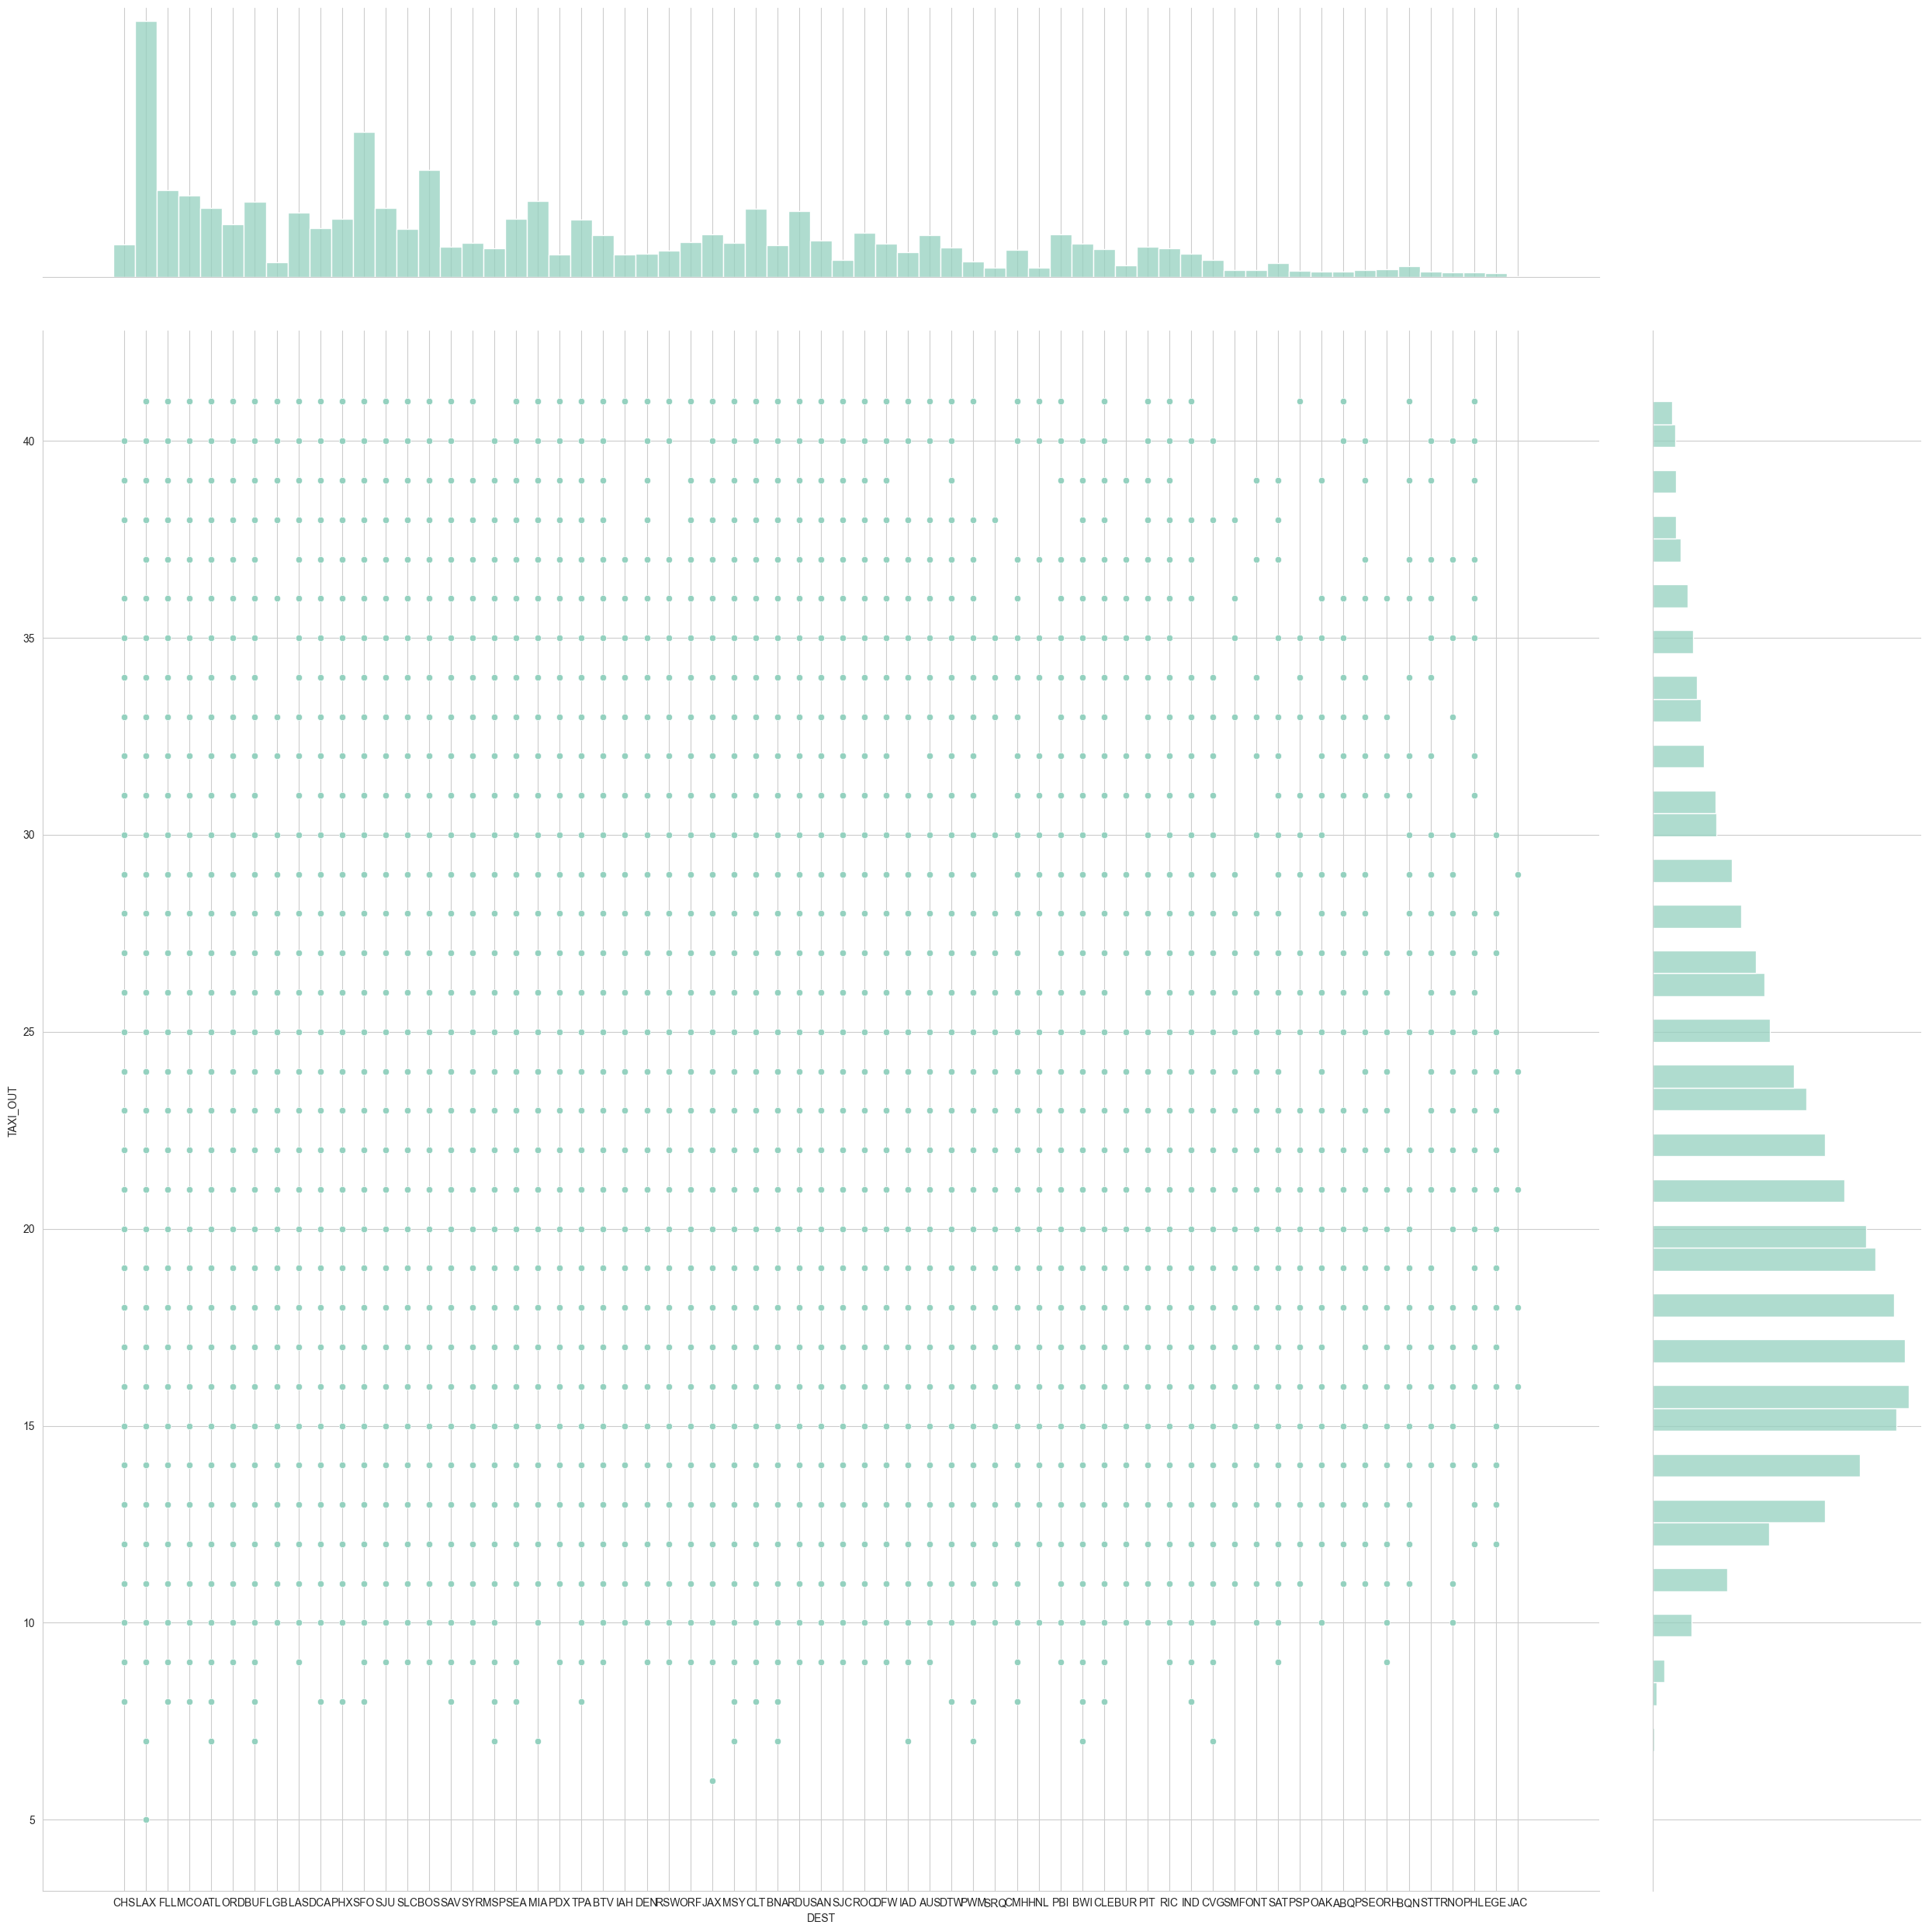

In [ ]:
#Exploratory Data Analysis
sns.jointplot(x='DEST',y='TAXI_OUT',data=df, height=25, )

C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

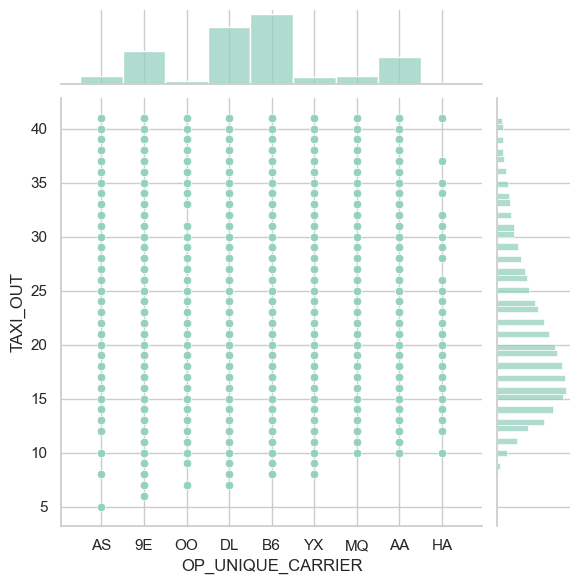

In [283]:
sns.jointplot(x='OP_UNIQUE_CARRIER',y='TAXI_OUT',data=df )

C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

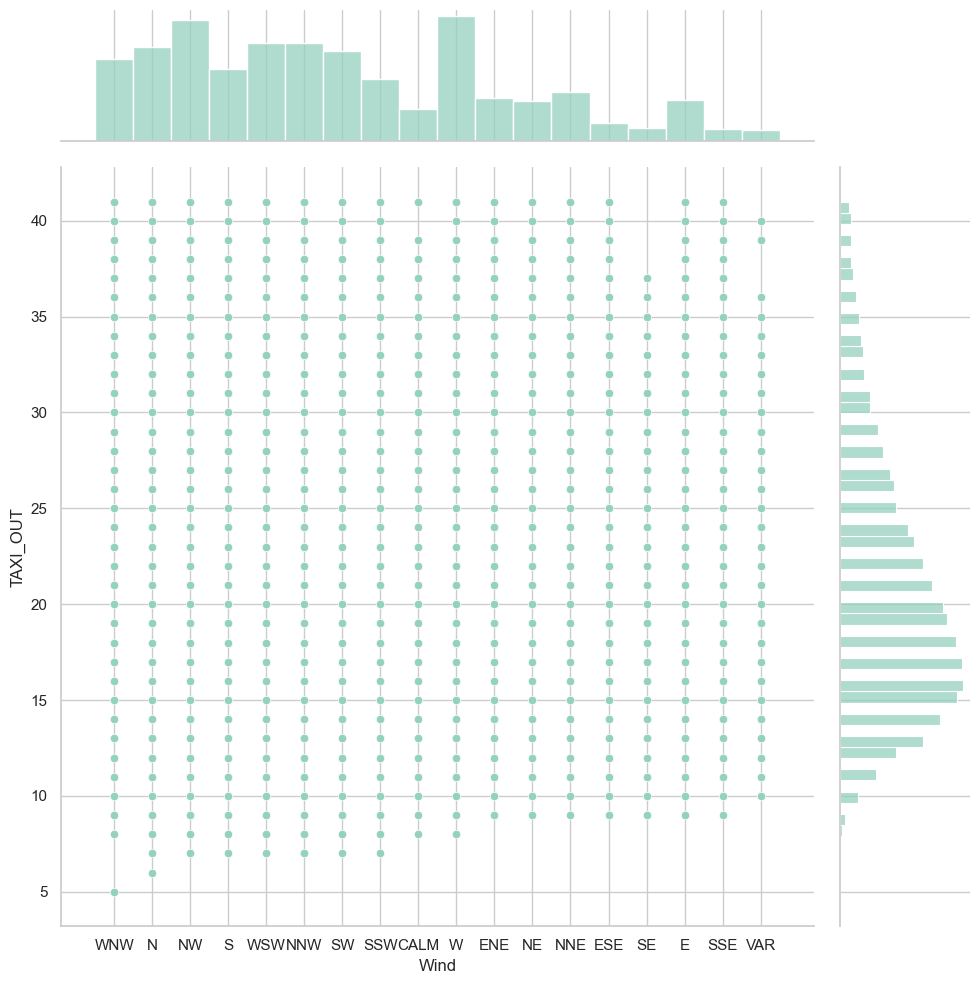

In [284]:

sns.jointplot(x='Wind',y='TAXI_OUT',data=df,  height=10 )

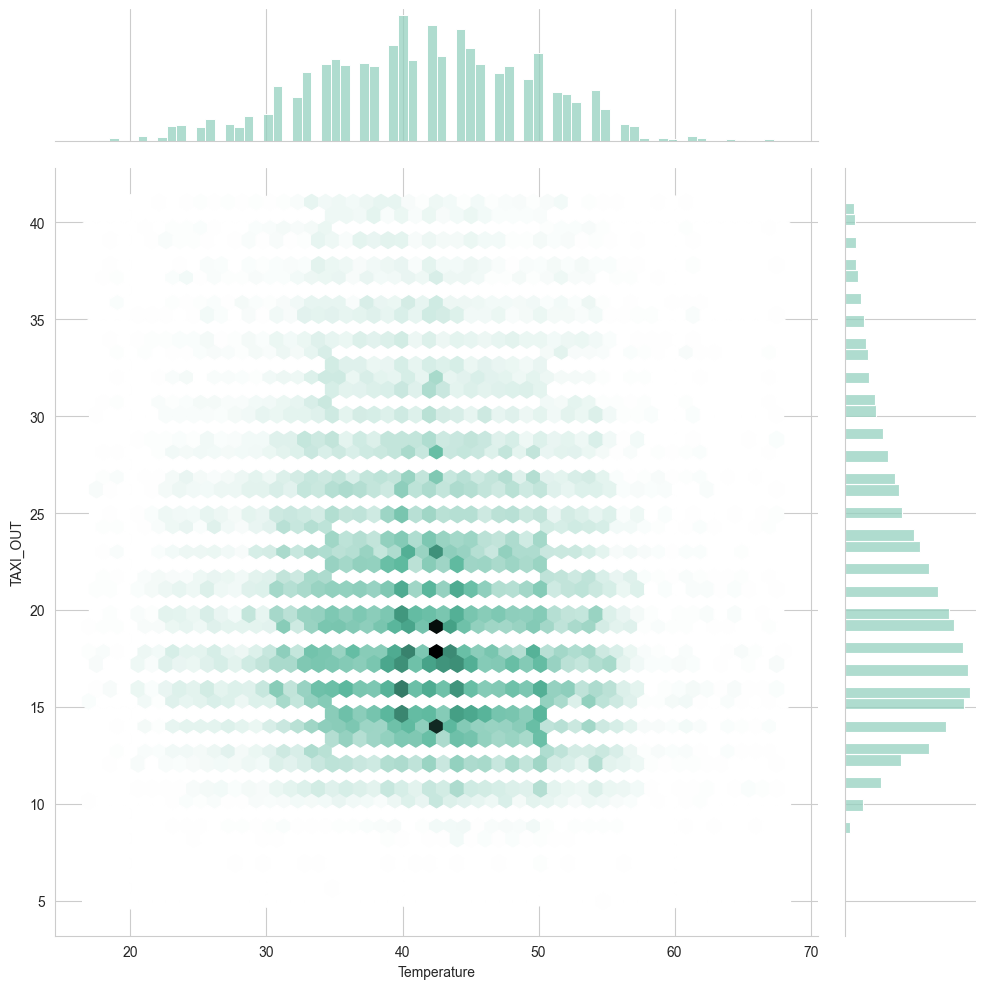

In [ ]:

sns.jointplot(x='Temperature',y='TAXI_OUT',data=df, kind="hex", height=10 )

C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

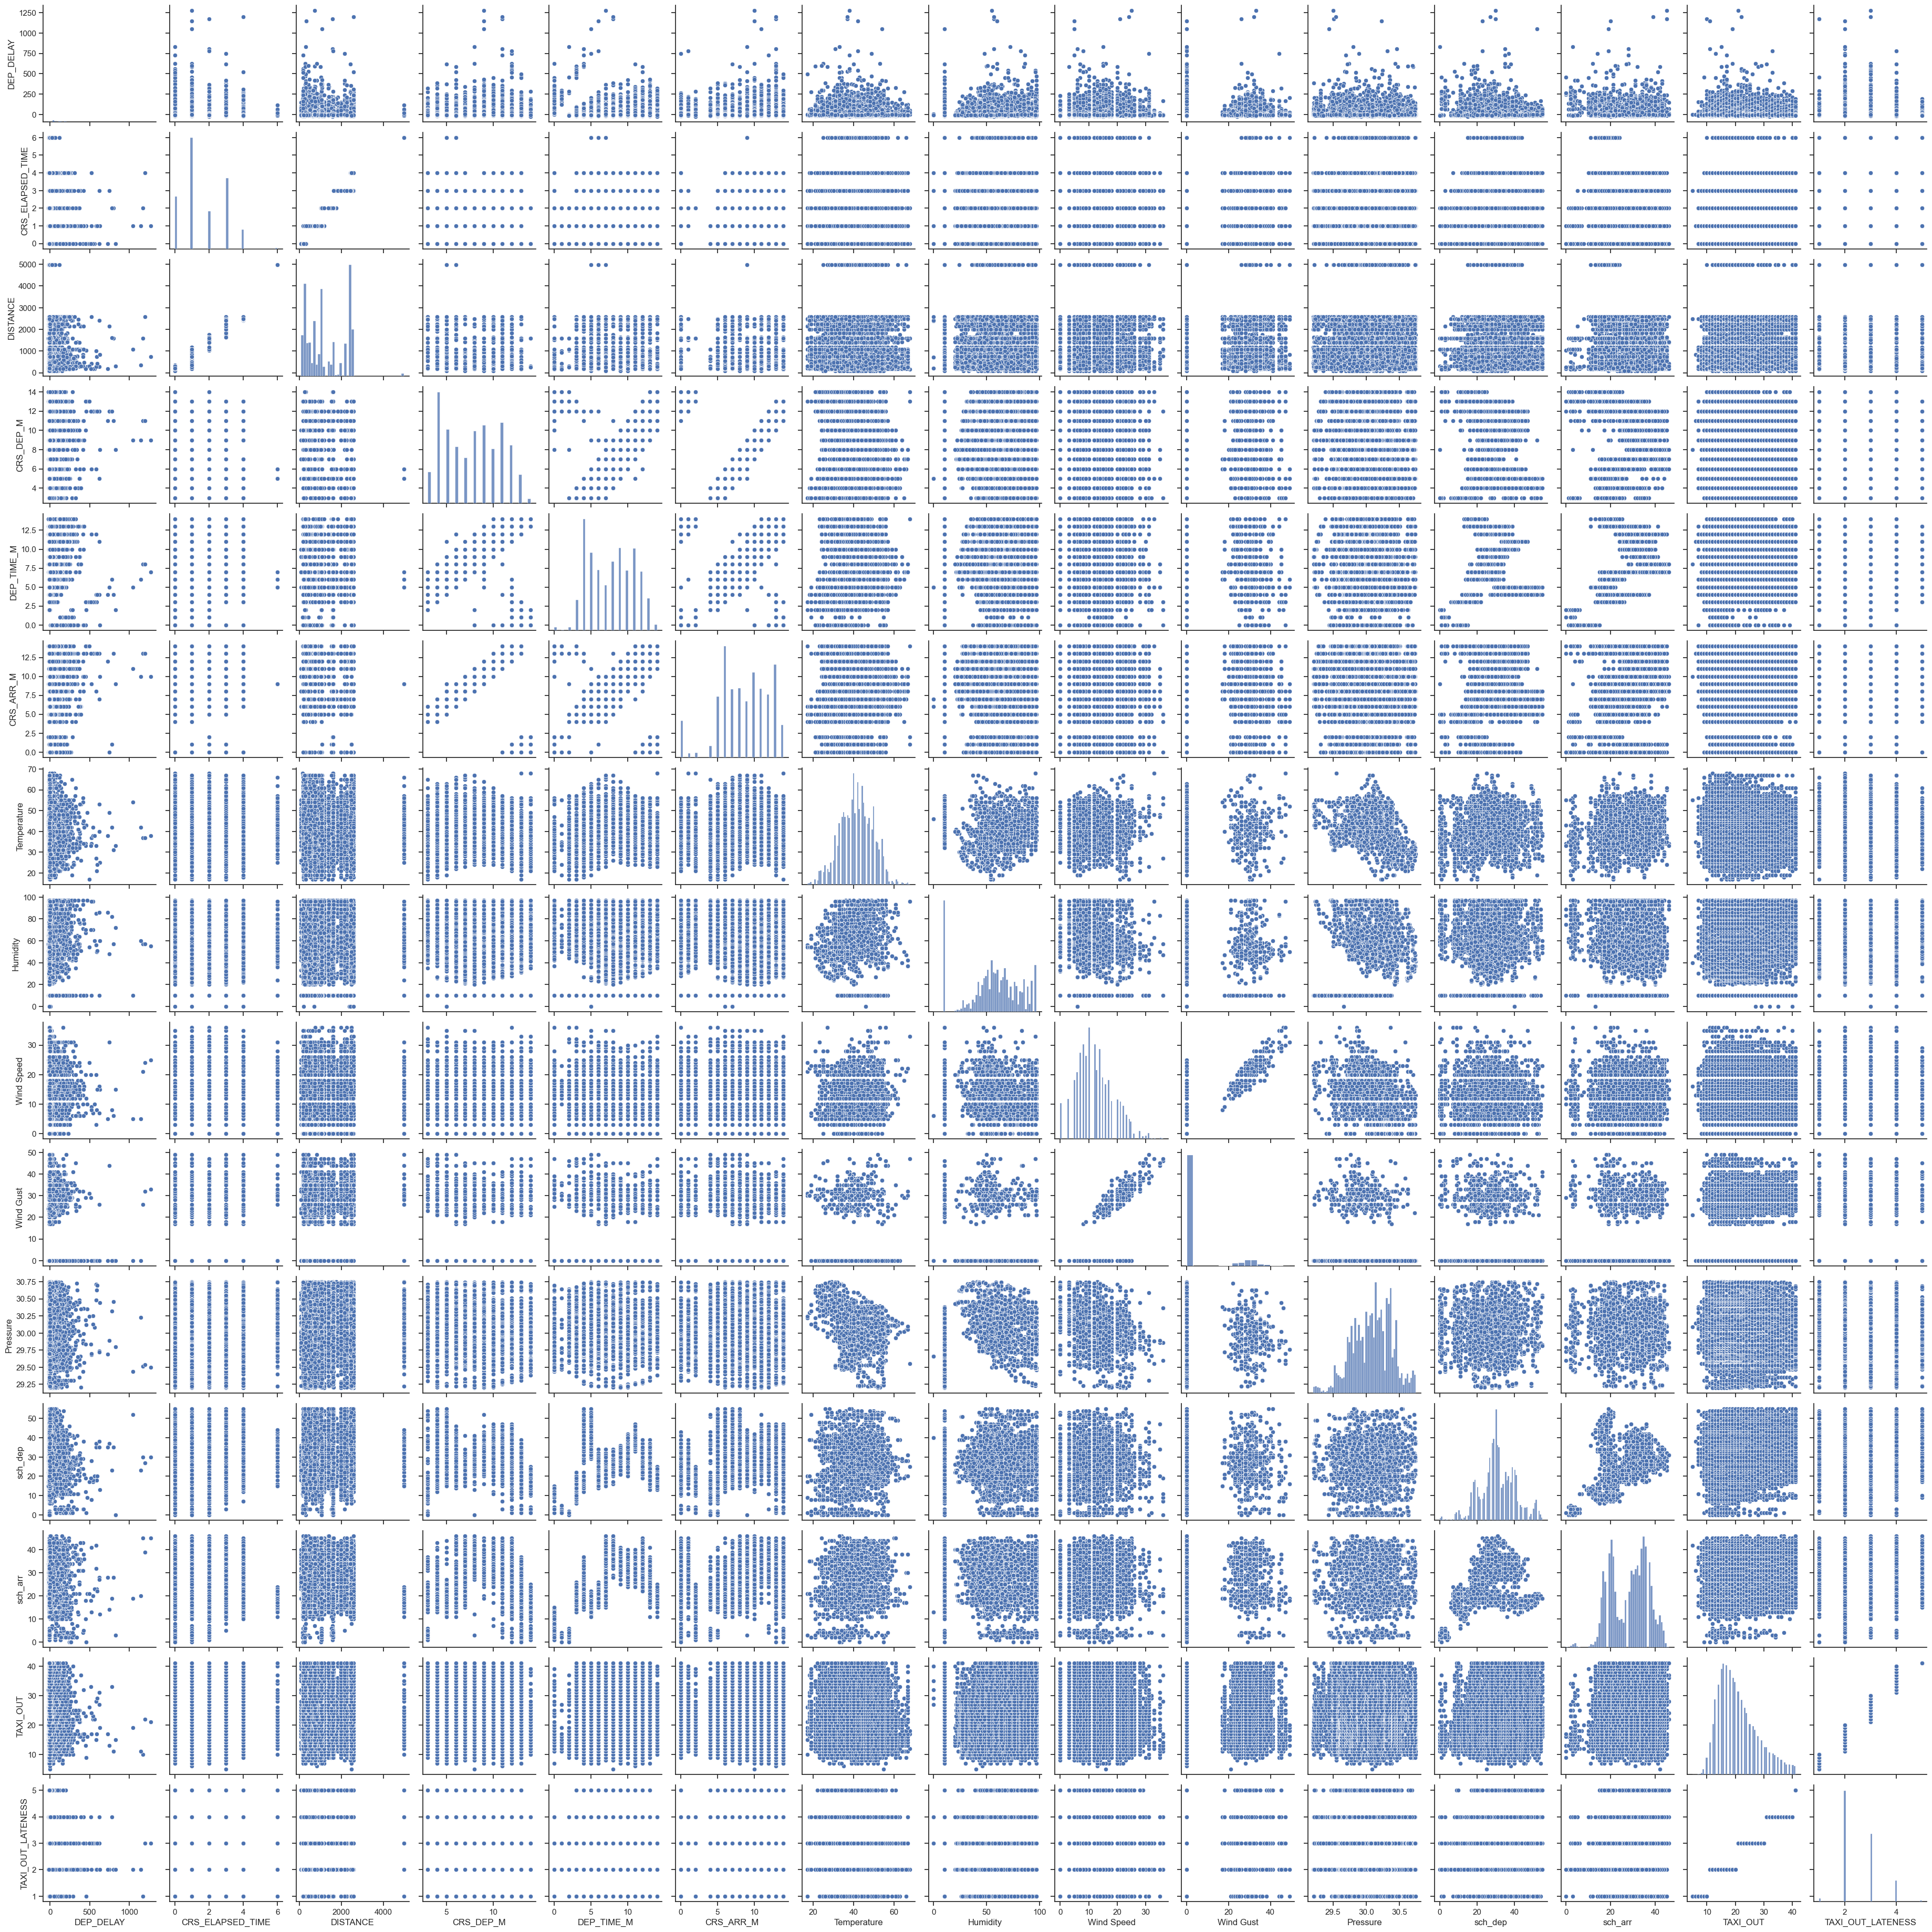

In [207]:
sns.pairplot(df)

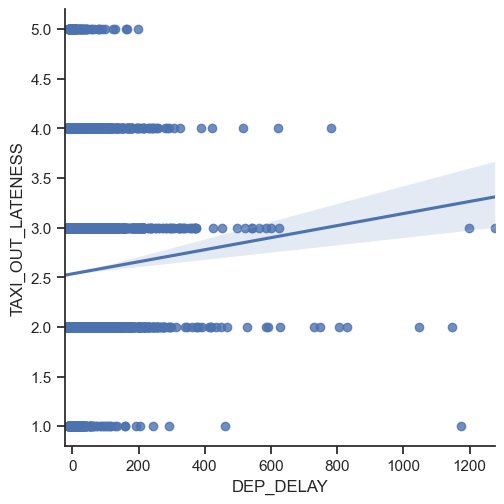

In [218]:
#Review specific correlations
sns.lmplot(x='DEP_DELAY',y='TAXI_OUT_LATENESS',data=df)

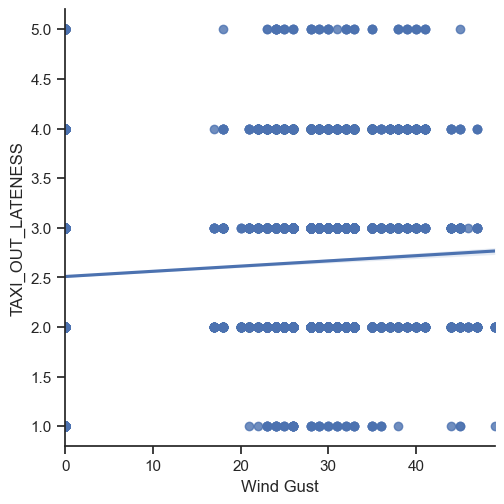

In [226]:
sns.lmplot(x='Wind Gust',y='TAXI_OUT_LATENESS',data=df)

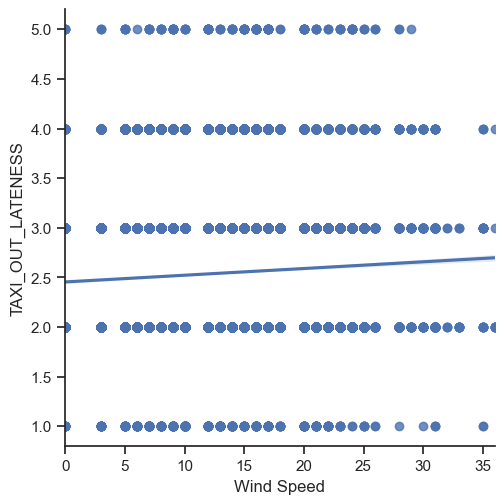

In [227]:
sns.lmplot(x='Wind Speed',y='TAXI_OUT_LATENESS',data=df)

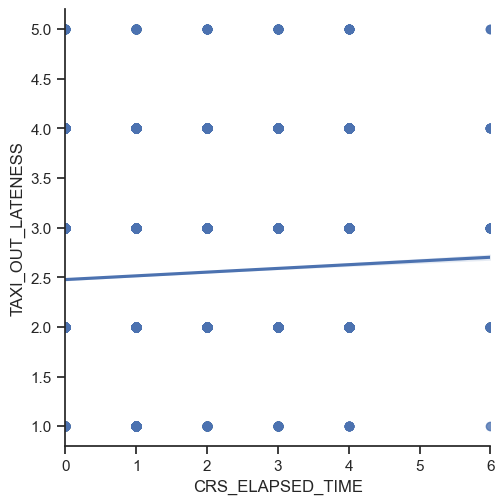

In [232]:
sns.lmplot(x='CRS_ELAPSED_TIME',y='TAXI_OUT_LATENESS',data=df)

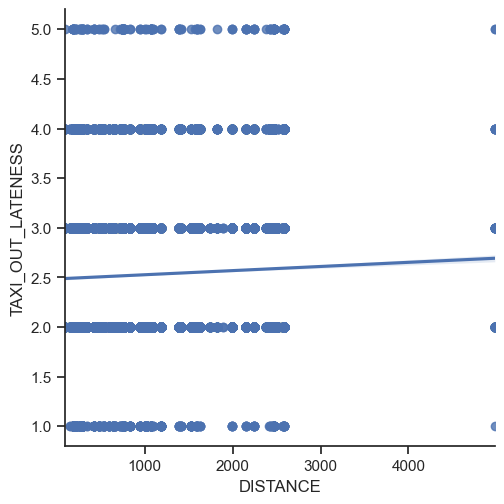

In [233]:
sns.lmplot(x='DISTANCE',y='TAXI_OUT_LATENESS',data=df)

In [266]:
#Training and Testing Data
X = df[['DEP_DELAY','Wind Gust','Wind Speed','CRS_ELAPSED_TIME','DISTANCE']]

y = df['TAXI_OUT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [267]:
#Training the Model

#Create an instance of a Linear Regression model.
lm = LinearRegression()

#Train/fit lm on the training data.
lm.fit(X_train,y_train)

LinearRegression()

In [268]:
#Print out the coefficients of the model
lm.coef_

array([ 8.52693165e-03,  5.37050562e-02, -1.31986862e-02,  1.19554599e+00,
       -1.10868842e-03])

In [269]:
#Predicting Test Data

#Predict off the X_test set of the data.
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

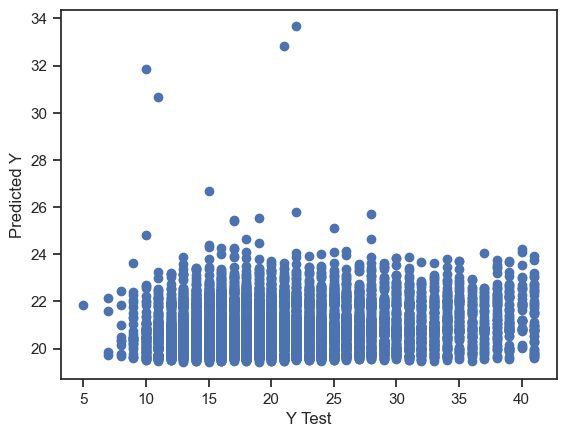

In [270]:
#Create a scatterplot of the real test values versus the predicted values.
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [271]:
#Evaluating the Model

#Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

#Mean Squared Error | Summation of squares of all (predicted - actual values) divided by the number of data points.
#Mean Absolute Error(MAE) | the average of all absolute errors
#Relative mean absolute error | Calculates the mean relative absolute error (MRAE) between the forecast and the eventual outcomes.


print('Mean absolute error :'," ", metrics.mean_absolute_error(y_test,predictions))
print('Mean squared error :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE :   5.434655496330441
MSE :   45.5360812849933
RMAE :   6.748042774389719


C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='TAXI_OUT', ylabel='Density'>

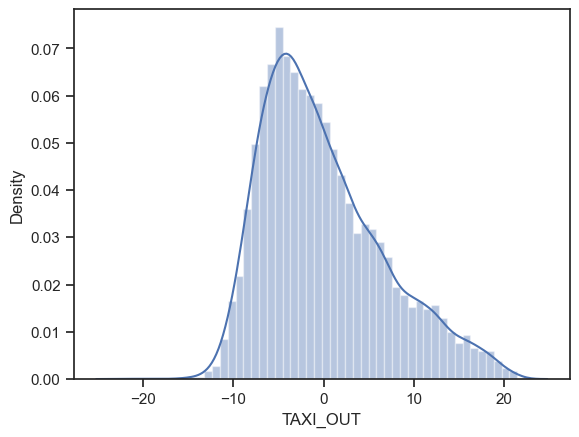

In [272]:
#Residuals

#Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().
sns.distplot(y_test - predictions,bins=50)

In [273]:
#Conclusion

coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients



Coeffecient
DEP_DELAY            0.008527
Wind Gust            0.053705
Wind Speed          -0.013199
CRS_ELAPSED_TIME     1.195546
DISTANCE            -0.001109

In [ ]:
"""
Holding all other features fixed, a 1 unit increase in Departure delay of the flight is associated with an increase of 0.0085 total hours of delay.
Holding all other features fixed, a 1 unit increase in Wind Gust is associated with an increase of 0.054 total hours of delay.
Holding all other features fixed, a 1 unit increase in Wind Speed is not associated with any increase of delay.
Holding all other features fixed, a 1 unit increase in Scheduled journey time of the flight is associated with an increase of 1.2 total hours of delay.
Holding all other features fixed, a 1 unit increase in DISTANCE is not associated with any increase of delay.
"""

Text(0, 0.5, 'Predicted Y')

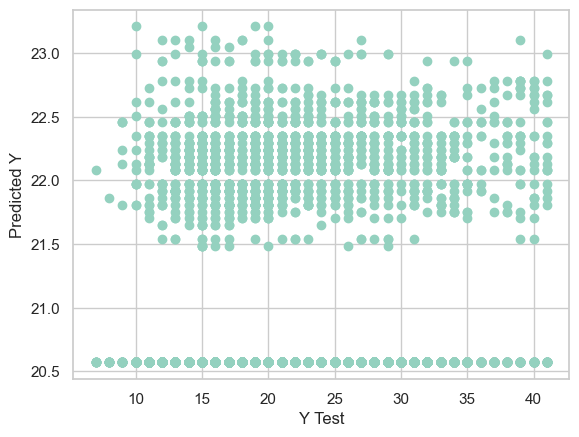

In [311]:
#Further tests and exploration

#Training and Testing Data
X2 = df[['Wind Gust']]

y2 = df['TAXI_OUT']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=30)

#Training the Model

#Create an instance of a LinearRegression() model named lm.
lm = LinearRegression()

#Train/fit lm on the training data.
lm.fit(X_train2,y_train2)

#Print out the coefficients of the model
lm.coef_

#Predicting Test Data

#Use lm.predict() to predict off the X_test set of the data.
predictions2 = lm.predict(X_test2)

#Create a scatterplot of the real test values versus the predicted values.
plt.scatter(y_test2,predictions2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')